In [1]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
# Step 2: Load the dataset
df = pd.read_csv("HeartDiseaseTrain-Test.csv")
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [3]:
# Step 3: Split features and target
X = df.drop("target", axis=1)
y = df["target"]

# Handle categorical variables with OneHotEncoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"
)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Transform categorical features
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Step 5: Train Decision Tree
dt = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Step 6: Train Random Forest
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 7: Evaluate both models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Decision Tree Accuracy:", accuracy_dt)
print("Random Forest Accuracy:", accuracy_rf)

print("\nDecision Tree Report:\n", classification_report(y_test, y_pred_dt))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))


Decision Tree Accuracy: 0.8682926829268293
Random Forest Accuracy: 0.9219512195121952

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       100
           1       0.85      0.90      0.87       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205


Random Forest Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       100
           1       0.92      0.92      0.92       105

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



C:\Users\dsnat\AppData\Local\Temp\ipykernel_30500\4265343759.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette="viridis")


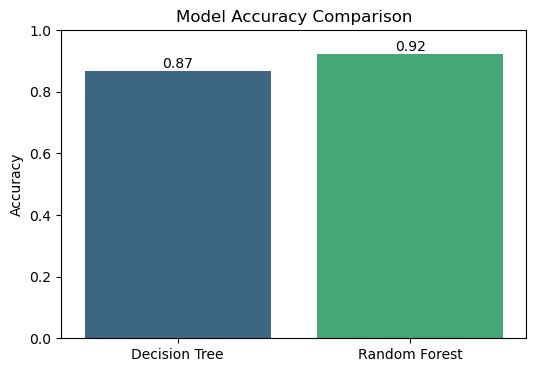

In [4]:
# Step 8: Plot Accuracy Comparison
plt.figure(figsize=(6,4))
models = ["Decision Tree", "Random Forest"]
accuracy = [accuracy_dt, accuracy_rf]
sns.barplot(x=models, y=accuracy, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=10)
plt.show()



C:\Users\dsnat\AppData\Local\Temp\ipykernel_30500\933397615.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


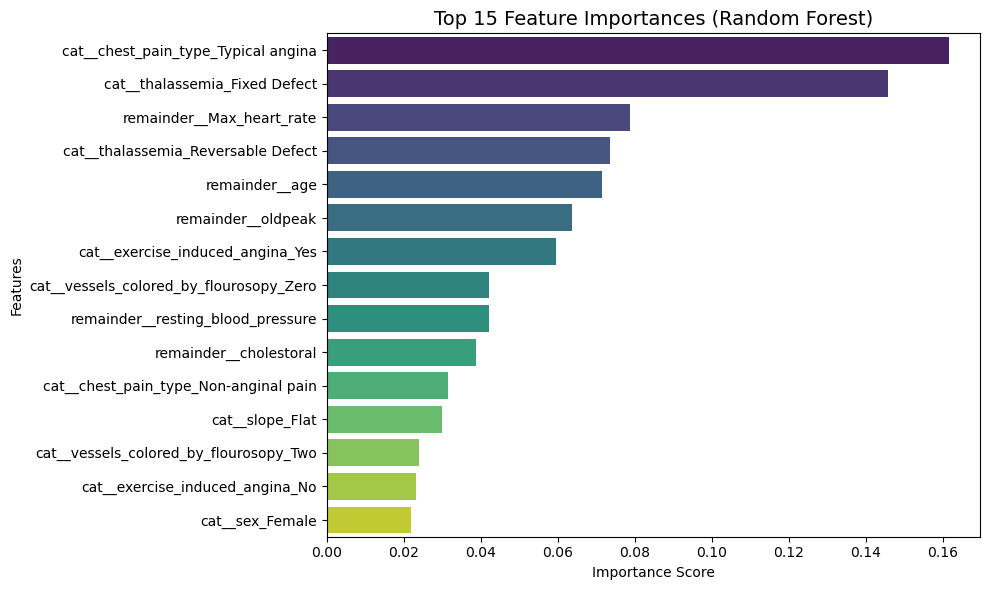

In [5]:
# Step 9: Feature Importance (Random Forest) - Clean Plot
importances = rf.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Create DataFrame for easy sorting
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot Top 15 features
plt.figure(figsize=(10,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feat_imp.head(15),
    palette="viridis"
)
plt.title("Top 15 Feature Importances (Random Forest)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()



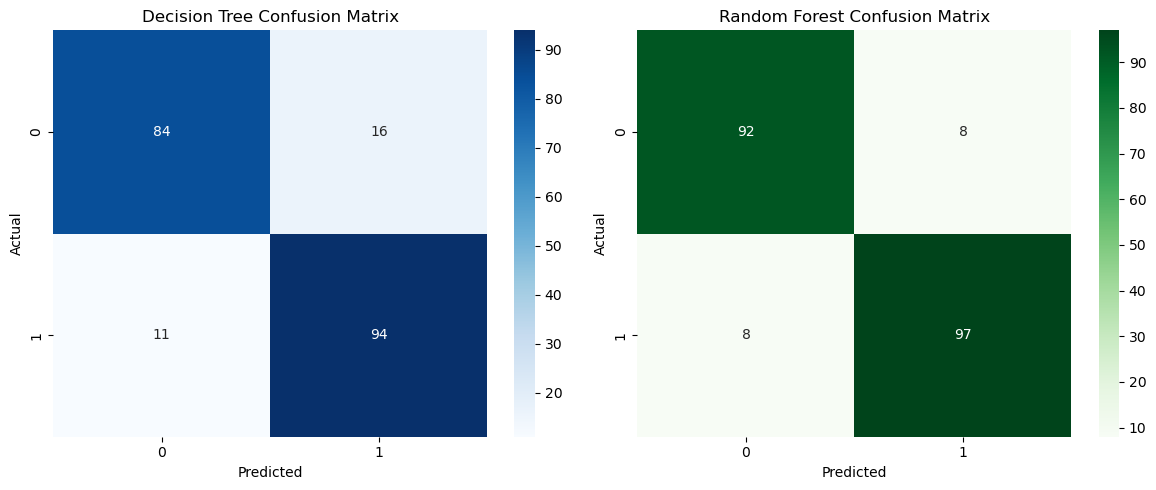

In [6]:
# Step 10: Confusion Matrix Heatmaps
fig, axes = plt.subplots(1,2, figsize=(12,5))

cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

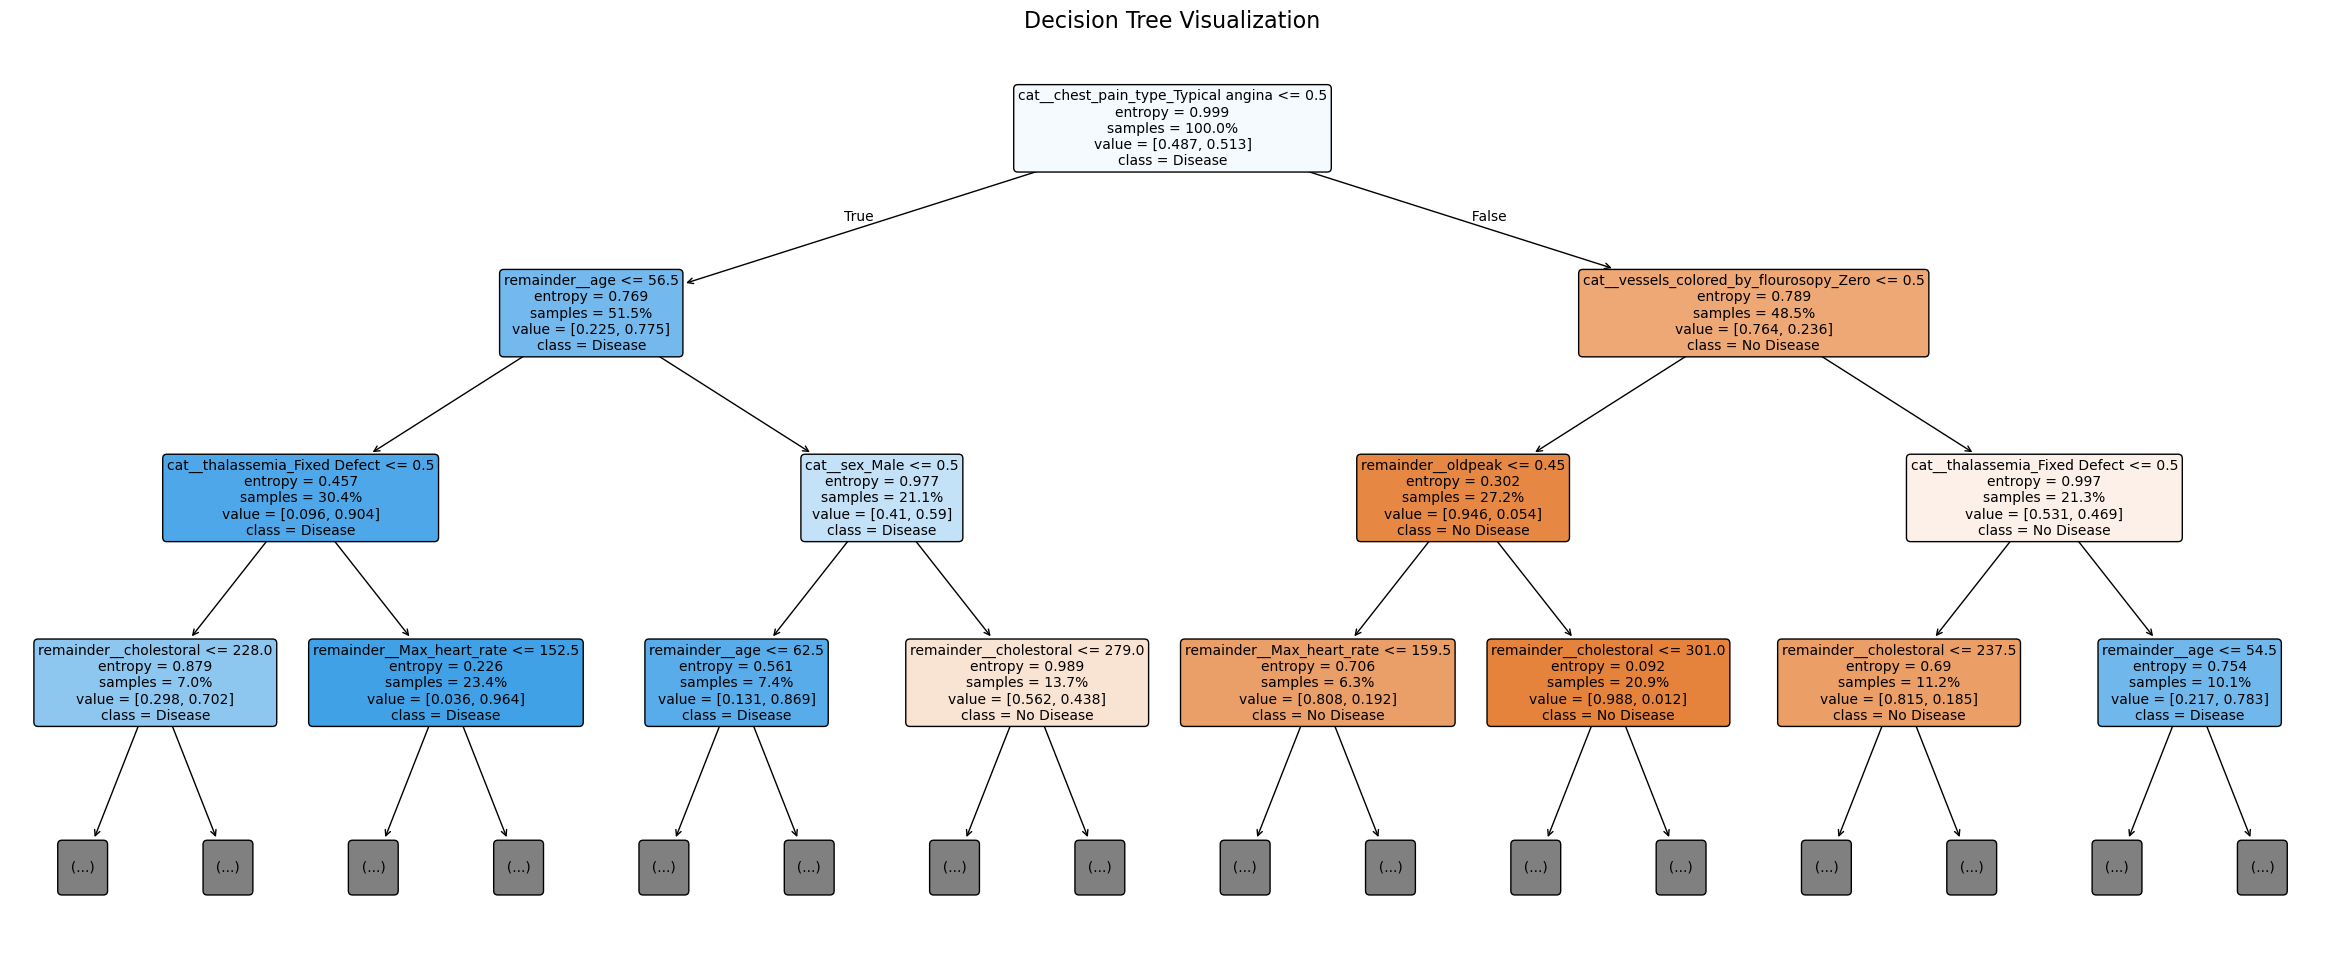

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 12))  # increase size for readability
plot_tree(
    dt,  # trained decision tree
    feature_names=preprocessor.get_feature_names_out(),
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    fontsize=10,
    proportion=True,  # makes box sizes proportional to samples
    max_depth=3
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()